### Loading the libraries

In [93]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the train and test data

In [94]:
x_train = pd.read_table('a3-train.data', delim_whitespace=True,header=-1)
y_train = pd.read_table('a3-train.labels.txt', delim_whitespace=True,header=-1)

x_test = pd.read_table('a3-test.data', delim_whitespace=True,header=-1)
y_test = pd.read_table('a3-test.labels.txt', delim_whitespace=True,header=-1)

## Exploratory Data Analysis Starts here :

### Verifying the shape of the datasets

In [95]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 500)
(2000, 1)
(600, 500)
(600, 1)


### Sneak Peek at the datasets

In [96]:
print(x_train.head())
print(y_train.head())
print(x_test.head())
print(y_test.head())

   0    1    2    3    4    5    6    7    8    9   ...   490  491  492  493  \
0  485  477  537  479  452  471  491  476  475  473 ...   477  481  477  485   
1  483  458  460  487  587  475  526  479  485  469 ...   463  478  487  338   
2  487  542  499  468  448  471  442  478  480  477 ...   487  481  492  650   
3  480  491  510  485  495  472  417  474  502  476 ...   491  480  474  572   
4  484  502  528  489  466  481  402  478  487  468 ...   488  479  452  435   

   494  495  496  497  498  499  
0  511  485  481  479  475  496  
1  513  486  483  492  510  517  
2  506  501  480  489  499  498  
3  454  469  475  482  494  461  
4  486  508  481  504  495  511  

[5 rows x 500 columns]
   0
0 -1
1 -1
2 -1
3  1
4  1
   0    1    2    3    4    5    6    7    8    9   ...   490  491  492  493  \
0  483  454  513  495  523  469  453  477  506  479 ...   455  480  543  259   
1  485  508  493  487  478  472  504  476  479  475 ...   486  480  535  534   
2  483  521  507  475

### Let's first check at the summary statistics of the train and the test data

In [97]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,481.722500,483.452500,510.166000,483.384500,501.612500,479.259000,480.109500,476.565000,486.793500,478.78900,...,482.458500,478.811500,486.356500,496.565500,493.49950,510.893000,478.219500,483.309000,507.977000,490.266000
std,6.421769,30.186294,38.899165,9.059895,41.389418,6.795956,40.575925,1.384461,15.043836,7.19092,...,20.890033,4.011735,23.967366,127.635442,34.81902,37.459353,5.880613,13.559847,37.224297,25.825273
min,462.000000,381.000000,370.000000,453.000000,371.000000,459.000000,334.000000,471.000000,430.000000,455.00000,...,407.000000,463.000000,391.000000,130.000000,368.00000,398.000000,457.000000,435.000000,363.000000,403.000000
25%,477.000000,464.000000,485.000000,477.000000,475.000000,475.000000,452.750000,476.000000,477.000000,474.00000,...,468.000000,476.000000,471.000000,404.000000,470.00000,486.000000,474.000000,474.000000,482.000000,473.000000
50%,482.000000,483.000000,510.500000,483.000000,500.000000,479.000000,480.000000,477.000000,487.000000,479.00000,...,482.000000,479.000000,486.000000,504.000000,492.00000,511.000000,478.000000,483.000000,508.000000,490.000000
75%,486.000000,503.000000,536.000000,490.000000,528.000000,484.000000,506.250000,477.000000,496.250000,484.00000,...,496.000000,481.000000,502.000000,586.000000,517.00000,535.000000,482.000000,492.000000,533.000000,507.250000
max,503.000000,600.000000,654.000000,519.000000,688.000000,505.000000,611.000000,481.000000,536.000000,503.00000,...,549.000000,497.000000,566.000000,920.000000,615.00000,661.000000,500.000000,535.000000,644.000000,583.000000


In [98]:
x_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,481.808333,483.88000,506.581667,483.298333,498.636667,479.661667,481.751667,476.585000,487.758333,478.865000,...,481.576667,478.776667,485.898333,501.631667,494.85500,510.193333,477.923333,482.651667,509.968333,491.661667
std,5.940293,30.86557,38.365434,8.549727,41.199762,7.220625,39.939478,1.416375,16.021373,7.692772,...,20.752314,4.114406,22.723452,126.882457,35.10643,38.522841,5.803182,13.765760,36.366351,26.255529
min,462.000000,377.00000,390.000000,458.000000,360.000000,460.000000,345.000000,471.000000,437.000000,456.000000,...,418.000000,465.000000,420.000000,103.000000,402.00000,353.000000,462.000000,443.000000,384.000000,427.000000
25%,478.000000,464.00000,481.000000,478.000000,470.000000,475.000000,453.000000,476.000000,477.750000,474.000000,...,467.750000,476.000000,471.000000,409.750000,471.00000,485.000000,474.000000,473.000000,485.000000,474.000000
50%,482.000000,485.00000,506.000000,483.000000,496.500000,480.000000,484.000000,477.000000,487.000000,478.000000,...,482.000000,479.000000,486.000000,510.000000,495.00000,508.500000,478.000000,482.000000,508.000000,492.000000
75%,486.000000,505.00000,533.000000,489.000000,525.000000,484.000000,508.000000,477.000000,497.000000,483.000000,...,495.000000,481.000000,501.000000,589.250000,517.00000,536.000000,482.000000,492.250000,533.000000,508.000000
max,500.000000,610.00000,619.000000,508.000000,618.000000,501.000000,606.000000,482.000000,547.000000,505.000000,...,540.000000,492.000000,571.000000,822.000000,614.00000,620.000000,494.000000,526.000000,621.000000,593.000000


Note : There doesn't seem to much variation among the features except for the standard deviation, but we would need to investiage further

### Let's verify the data types of the features which will gives an idea on how to proceed with the next steps

In [99]:
cols = x_train.columns
num_cols1 = (x_train._get_numeric_data().columns)
num_cols = len(x_train._get_numeric_data().columns)
factor_cols = len(list(set(cols) - set(num_cols1)))
print("Number of Numerical cols is {} and categorical cols is {} in the train data".format(num_cols,factor_cols))

cols = x_test.columns
num_cols1 = (x_test._get_numeric_data().columns)
num_cols = len(x_test._get_numeric_data().columns)
factor_cols = len(list(set(cols) - set(num_cols1)))
print("Number of Numerical cols is {} and categorical cols is {} in the test data".format(num_cols,factor_cols))

Number of Numerical cols is 500 and categorical cols is 0 in the train data
Number of Numerical cols is 500 and categorical cols is 0 in the test data


Note : There are only numerical columns in both the train and the test data

### Let's look at the missing values present in the features of the train and the test data

In [100]:
print(x_train.isnull().any().any())
print(x_test.isnull().any().any())

False
False


Note: Both train and test do not have any missing values and this is actually a blessing in disguise

### Checking if there are single level features in the train and test data

In [101]:
single_level_cols_train = [cols for cols in x_train.columns if x_train[cols].nunique(dropna=False)==1 ]
single_level_cols_test = [cols for cols in x_test.columns if x_test[cols].nunique(dropna=False)==1 ]

print("The number of single level columns in train is {}".format(len(single_level_cols_train)))
print("The number of single level columns in test is {}".format(len(single_level_cols_test)))

The number of single level columns in train is 0
The number of single level columns in test is 0


Note: Both train and test do not have any columns with just 1 value being duplicated across all records

### Checking the number of unique values in each feature in the train and test data

In [102]:
cat_cols = pd.DataFrame(x_train.T.apply(lambda x: x.nunique(), axis=1))
cat_cols['Column Name'] = cat_cols.index
cols = ['Unique_Vals','Column Name']
cat_cols.columns = cols
cat_cols = cat_cols[cat_cols['Unique_Vals']<=20]
categorical_cols = cat_cols['Column Name']

In [103]:
tt = pd.DataFrame(x_test.T.apply(lambda x: x.nunique(), axis=1))
tt['Column Name'] = tt.index
cols = ['Unique_Vals','Column Name']
tt.columns = cols
tt[tt['Unique_Vals']<=10]

,Unique_Vals,Column Name
90,5,90
154,7,154
168,8,168
173,8,173
198,9,198
205,8,205
228,7,228
276,5,276
280,9,280
283,9,283


We can see that there are quite a few columns with very less unique values and actually we can make these variables as categorical variables and factorize them and then build models.

Note:
1. We will do this step as a part of our feature engineering
2. We would need to combine the train and test and perfrom factorization and then split them back in order to account for extra level in test when compared to train in a particular feature

### Checking for duplicate columns in the data sets

In [104]:
d0 = x_train.T.drop_duplicates().T
d1 = x_test.T.drop_duplicates().T
print("Shape of the data frame after removing any duplicate columns in train is {}".format(d0.shape))
print("Shape of the data frame after removing any duplicate columns in test is {}".format(d1.shape))

Shape of the data frame after removing any duplicate columns in train is (2000, 500)
Shape of the data frame after removing any duplicate columns in test is (600, 500)


There are no 2 columns with same values for all records in both the train and the test data

### Checking if there are any ID columns

In [105]:
cols = pd.DataFrame(x_train.T.apply(lambda x: x.nunique(), axis=1))
cols['Column Name'] = cols.index
cols1 = ['Unique_Vals','Column Name']
cols.columns = cols1
max(cols['Unique_Vals'])

552

Since the maximum number of unique values in the data is 552, we can confirm that there are no unique identifier columns 

### Checking for Skewness in the variables

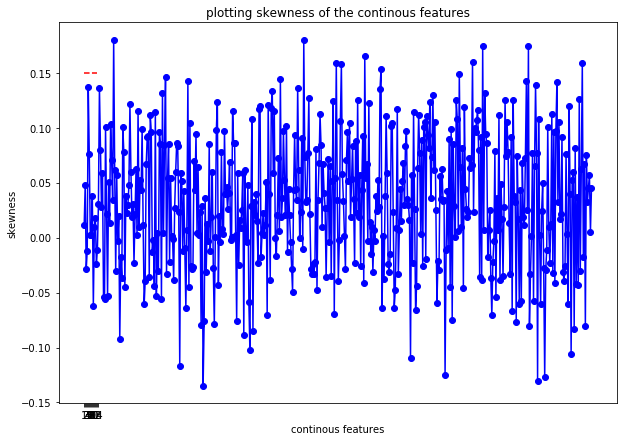

In [106]:
#Source : https://github.com/Prashanth1194/Useful-Python-Codes/blob/master/Python%20Code.ipynb
from scipy import stats

skewness_list = []
for cn in x_train.columns:
    skewness_list.append(stats.skew(x_train[cn]))

plt.figure(figsize=(10,7))
plt.plot(skewness_list, 'bo-')
plt.xlabel("continous features")
plt.ylabel("skewness")
plt.title("plotting skewness of the continous features")
plt.xticks(range(15), range(1,15,1))
plt.plot([(0.15) for i in range(0,14)], 'r--')
#plt.text(10, .1, 'threshold = 0.25')
plt.show()

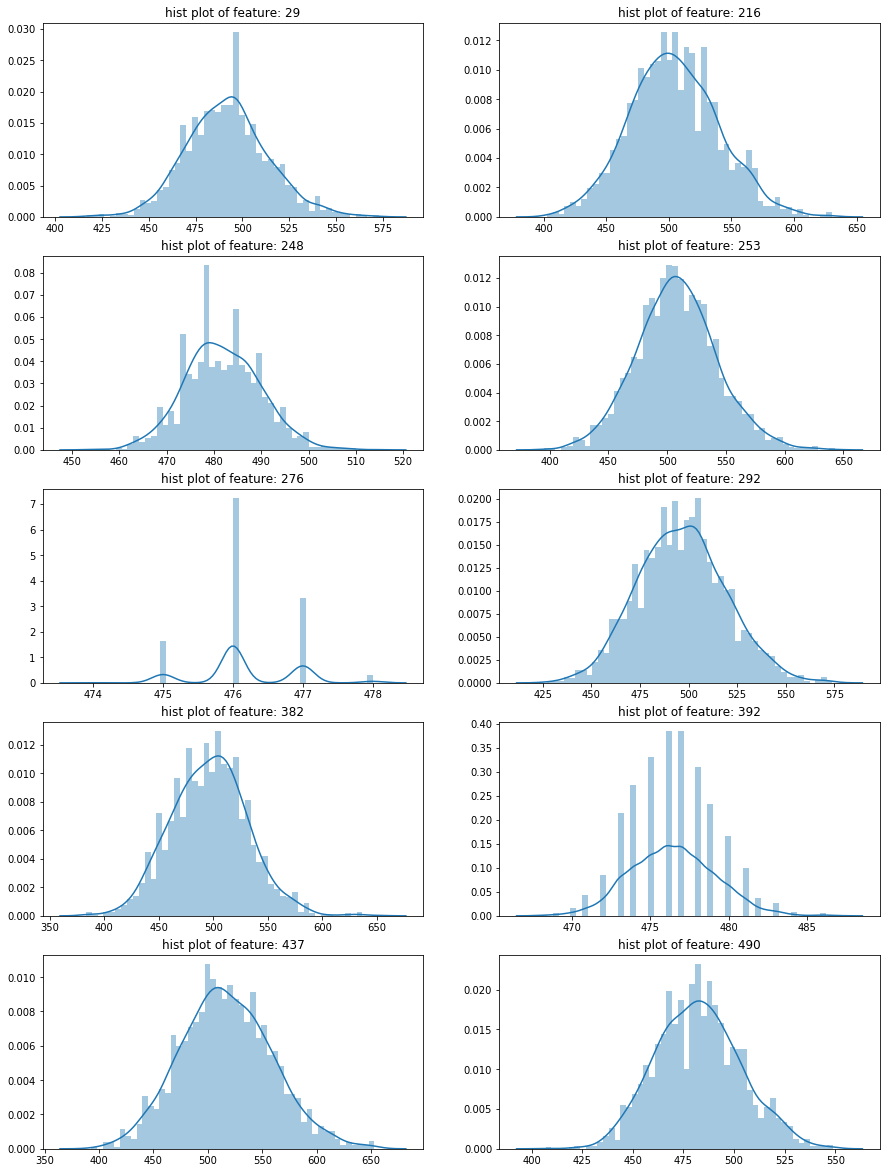

In [107]:
skewed_cont_columns = []
for i, cn in enumerate(x_train.columns):
    if skewness_list[i] >= 0.15:
        skewed_cont_columns.append(cn)


plt.figure(figsize=(15,25))
gs = gridspec.GridSpec(6, 2)
for i, cn in enumerate(skewed_cont_columns):
    ax = plt.subplot(gs[i])
    sns.distplot(x_train[cn], bins=50)
    ax.set_xlabel('')
    ax.set_title('hist plot of feature: ' + str(cn))
plt.show()

Even though we kept a small cut-off of 0.15, the features above this cut-off still seem to be normally distributed

### Checking the balance of the target variable in train data

In [108]:
y_train[0].value_counts()

 1    1000
-1    1000
Name: 0, dtype: int64

Note:The train data has a perfectly balanced distribution of the target variable hence we do not need to perform any sampling technique.
This will actually help us in choosing a variety of evaluation metric to evaluate the models. Eg : Accuracy, AUC-ROC and F-Score would be a good start

## Baseline Models Starts here :

Note: Let's take Logistic Regression, K Nearest Neighbours, RandomForest, Gradient Boosting as the 4 models and optimize it further using feature engineering and hyperparameter tuning later

In [109]:
class baseline_models:
    
    def logistic_regression(self,x_train,y_train,x_test,y_test):
        lr = LogisticRegression(random_state=20)
        lr.fit(x_train,y_train)
        test_pred = lr.predict_proba(x_test)[:,1]
        test_pred1 = lr.predict(x_test)
        print("Logistic Regression:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred)
    
    def knn(self,x_train,y_train,x_test,y_test):
        neigh = KNeighborsClassifier()
        neigh.fit(x_train, y_train)
        test_pred1 = neigh.predict(x_test)
        test_pred = neigh.predict_proba(x_test)[:,1]
        print("K Nearest Neighbour Classifier:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred)
            
    
    def random_forest(self,x_train,y_train,x_test,y_test):

        cf_rf = RandomForestClassifier(random_state=20)
        cf_rf.fit(x_train,y_train)
        test_pred = cf_rf.predict_proba(x_test)[:,1]
        test_pred1 = cf_rf.predict(x_test)
        features = x_train.columns
        importances = cf_rf.feature_importances_
        indices = np.argsort(importances)
        #print(indices)
        imp_table_rf = pd.DataFrame(columns = ['Feature','Value'])
            
        imp_table_rf['Feature'] = x_train.columns
        imp_table_rf['Value'] = cf_rf.feature_importances_
        feat_imp = pd.Series(cf_rf.feature_importances_, features).sort_values(ascending=False)
        feat_imp = feat_imp[0:10]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')   
        #imp_table_rf['Feature'] = x_train.columns
        #imp_table_rf['Value'] = cf_rf.feature_importances_
        #plt.title('Feature Importance for Random Forest')
        #plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        #plt.yticks(range(len(indices)), [features[i] for i in indices])
        #plt.xlabel('Relative Importance')
        plt.show()
        
        print("Random Forest Classifier:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred,imp_table_rf)
        
    def boosting_model(self,x_train,y_train,x_test,y_test):

        cf_gb = GradientBoostingClassifier(random_state=20)
        cf_gb.fit(x_train,y_train)
        test_pred = cf_gb.predict_proba(x_test)[:,1]
        test_pred1 = cf_gb.predict(x_test)
        features = x_train.columns#[1:10]
        importances = cf_gb.feature_importances_#[1:10]
        indices = np.argsort(importances)
        imp_table = pd.DataFrame(columns = ['Feature','Value'])
        imp_table['Feature'] = x_train.columns
        imp_table['Value'] = cf_gb.feature_importances_
        plt.title('Feature Importance for Gradient Boosting')
        #indices = indices[0:10]
        #print(len(indices))
        #print(importances[indices])
        feat_imp = pd.Series(cf_gb.feature_importances_, features).sort_values(ascending=False)
        feat_imp = feat_imp[0:10]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        #plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        #plt.yticks(range(len(indices)), [features[i] for i in indices])
        #plt.xlabel('Relative Importance')
        plt.show()
        print("Gradient Boosting Model:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred,imp_table)



Logistic Regression:
Test AUC-ROC value is 0.6018888888888889
Test Accuracy is 0.59


K Nearest Neighbour Classifier:
Test AUC-ROC value is 0.7580166666666666
Test Accuracy is 0.6916666666666667




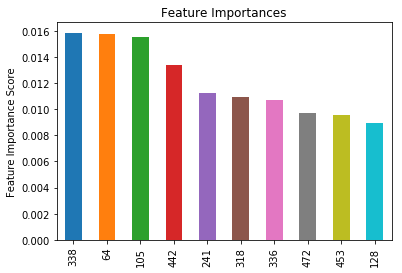

Random Forest Classifier:
Test AUC-ROC value is 0.6746666666666665
Test Accuracy is 0.6283333333333333




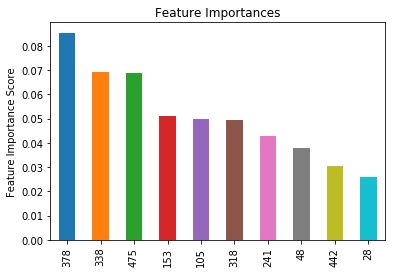

Gradient Boosting Model:
Test AUC-ROC value is 0.8340111111111111
Test Accuracy is 0.7433333333333333




In [110]:
base = baseline_models()
test_pred_glm = base.logistic_regression(x_train,y_train,x_test,y_test)
test_pred_knn = base.knn(x_train,y_train,x_test,y_test)
test_pred_rf,imp_table_rf = base.random_forest(x_train,y_train,x_test,y_test)
test_pred_gbm,imp_table_gbm = base.boosting_model(x_train,y_train,x_test,y_test)

### Combining the feature importance of both the tree models 

In [111]:
imp_table = pd.merge(imp_table_gbm,imp_table_rf,on='Feature',how='inner')
imp_table = imp_table.sort_index(by=['Value_x', 'Value_y'], ascending=[False, False])
imp_table['combined'] = imp_table['Value_x'] + imp_table['Value_y']
imp_table = imp_table.sort_index(by=['combined'], ascending=[False])
imp_table.head()

,Feature,Value_x,Value_y,combined
378,378,0.085473,0.006504,0.091977
338,338,0.069296,0.015853,0.085148
475,475,0.068822,0.008472,0.077294
105,105,0.049749,0.015559,0.065307
318,318,0.049477,0.010963,0.060440


Next we need to perform Feature Engineering and check if these baseline models improve in performance

## Feature Engineering Starts here :

#### First let's try removing correlated features from original data and check the baseline model performance

The Variance Inflation Factor (VIF) is used as a method to remvoe correlated variables and even though the tree based models do not have a problem handling correlated variables, the logistic regression should give better results after removing correlated variables.

VIF basically takes in every independent variable and considers it as the dependent variable and builds a regression with all other variables as the independent variables and computes the R^2 value and further the VIF value which is (1/(1-R^2)) for each independent variable present in our data set.

If the R^2 value is high, it means that the other independent variables are able to capture the variance captured by independent variable under consideration and we can remove it. Usually R^2 value of 0.9 will give a VIF value of 10 and anything more than 10 we can remove the variable . In this case, we will be more strict on the variables and have a VIF cut-off of 5 since we have 500 variables.

#### Note: This function might take sometime to execute

In [112]:
def variance_inflation_factors(exog_df):

    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs


In [113]:
vif_vals = variance_inflation_factors(x_train)

In [114]:
vif_df = pd.DataFrame(columns=['Cols','VIF_Values'])
tt = pd.DataFrame(vif_vals)
vif_df['Cols'] = tt.index
vif_df['VIF_Values'] = tt['VIF']

Keeping VIF cut-off as 5 (In this case a cut-off of 5 or 10 gives the same result), we remove the correlated variables and check the accuracy of the baseline model.

In [115]:
tt = vif_df[vif_df['VIF_Values']>=5]
corr_cols = list(tt['Cols'])
required_features = [i for i in x_train.columns if i not in corr_cols]

Logistic Regression:
Test AUC-ROC value is 0.5999000000000001
Test Accuracy is 0.5733333333333334


K Nearest Neighbour Classifier:
Test AUC-ROC value is 0.7685166666666666
Test Accuracy is 0.6933333333333334




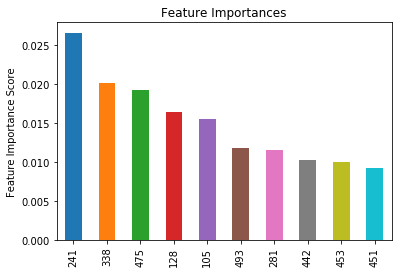

Random Forest Classifier:
Test AUC-ROC value is 0.6847111111111112
Test Accuracy is 0.6283333333333333




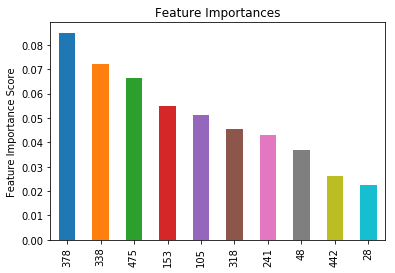

Gradient Boosting Model:
Test AUC-ROC value is 0.8256111111111111
Test Accuracy is 0.7283333333333334




In [116]:
test_pred_glm = base.logistic_regression(x_train[required_features],y_train,x_test[required_features],y_test)
test_pred_knn = base.knn(x_train[required_features],y_train,x_test[required_features],y_test)
test_pred_rf = base.random_forest(x_train[required_features],y_train,x_test[required_features],y_test)
test_pred_gbm = base.boosting_model(x_train[required_features],y_train,x_test[required_features],y_test)

Note: It might be a bit surprising that Logistic regression dint improve in terms of AUC or Accuracy after removing correlated features but other models slightly improved (Not by a significant amount though).
Sometimes correlation does not lead to causality and maybe it's better to have these variables in the model and some more interesting feature engineering is required to improve the accuracies.

#### Replacing features with less levels with their Information Value

Weight of Evidence basically calculates the number of 1's and number of -1's for each level in the feature and then calculates a ratio between them by taking their respective logarithmic values and then calculates the Information value for each level in the feature

A function for calculating the information value

In [117]:
#Source for this function : https://www.kaggle.com/puremath86/iv-woe-starter-for-python/notebook

def calc_iv(df, feature, target, pr=False):

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
   

    return iv, data

Considering features with 10 or less levels as categorical features

In [118]:
cat_cols = pd.DataFrame(x_train.T.apply(lambda x: x.nunique(), axis=1))
cat_cols['Column Name'] = cat_cols.index
cols = ['Unique_Vals','Column Name']
cat_cols.columns = cols
cat_cols = cat_cols[cat_cols['Unique_Vals']<=10]
categorical_cols = cat_cols['Column Name']

In [119]:
x_train1 = x_train
x_test1 = x_test

x_train1['target'] = y_train
for i in categorical_cols:
    iv, data = calc_iv(x_train1, i, 'target')
    cols = ['Value','IV']
    data = data[cols]
    data['IV'] = data['IV'] * 100
    string = str('IV' + str(i))
    cols1 = ['Value',string]
    data.columns = cols1
    x_train1 = pd.merge(x_train1,data,left_on=i,right_on='Value',how='inner')
    x_test1 = pd.merge(x_test1,data,left_on=i,right_on='Value',how='inner')
    del x_train1['Value']
    del x_test1['Value']
    del x_train1[i]
    del x_test1[i]

del x_train1['target']

Normalizing the data

In [120]:
x_train1 = (x_train1 - x_train1.min())/(x_train1.max() - x_train1.min())
x_test1 = (x_test1 - x_test1.min())/(x_test1.max() - x_test1.min())

Logistic Regression:
Test AUC-ROC value is 0.5627777777777778
Test Accuracy is 0.5316666666666666


K Nearest Neighbour Classifier:
Test AUC-ROC value is 0.5153222222222222
Test Accuracy is 0.5216666666666666




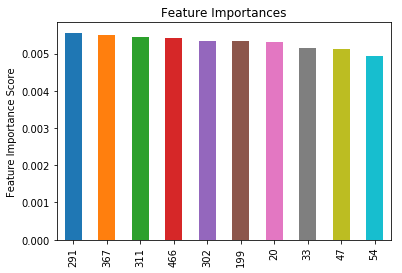

Random Forest Classifier:
Test AUC-ROC value is 0.43332777777777776
Test Accuracy is 0.445




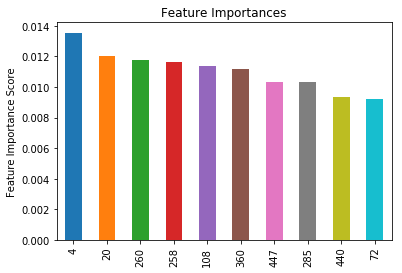

Gradient Boosting Model:
Test AUC-ROC value is 0.5628666666666666
Test Accuracy is 0.5466666666666666




In [121]:
test_pred_glm = base.logistic_regression(x_train1,y_train,x_test1,y_test)
test_pred_knn = base.knn(x_train1,y_train,x_test1,y_test)
test_pred_rf = base.random_forest(x_train1,y_train,x_test1,y_test)
test_pred_gbm = base.boosting_model(x_train1,y_train,x_test1,y_test)

Note: The baseline models aren't performing better after replacing certain "might-be" categorical features with the information value of their respective levels.
    In fact, they are performing very badly

#### Subsetting only the top 10 important features

In [122]:
useful_cols = list(imp_table.iloc[0:10,0])
useful_cols

[378, 338, 475, 105, 318, 153, 241, 442, 48, 28]

Logistic Regression:
Test AUC-ROC value is 0.6275444444444445
Test Accuracy is 0.5933333333333334


K Nearest Neighbour Classifier:
Test AUC-ROC value is 0.9607722222222222
Test Accuracy is 0.9




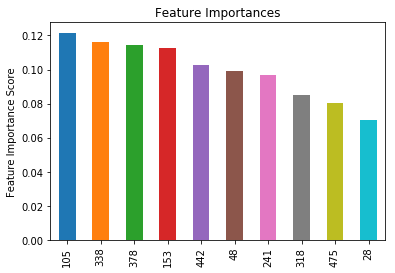

Random Forest Classifier:
Test AUC-ROC value is 0.9394666666666665
Test Accuracy is 0.8683333333333333




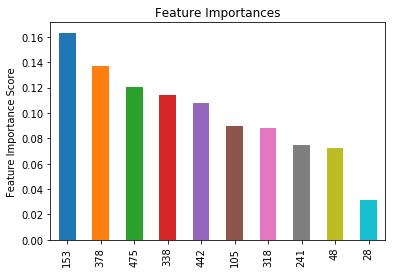

Gradient Boosting Model:
Test AUC-ROC value is 0.8886944444444446
Test Accuracy is 0.8183333333333334




In [123]:
test_pred_glm = base.logistic_regression(x_train[useful_cols],y_train,x_test[useful_cols],y_test)
test_pred_knn = base.knn(x_train[useful_cols],y_train,x_test[useful_cols],y_test)
test_pred_rf,imp_table_rf = base.random_forest(x_train[useful_cols],y_train,x_test[useful_cols],y_test)
test_pred_gbm,imp_table_gbm = base.boosting_model(x_train[useful_cols],y_train,x_test[useful_cols],y_test)

Note: We can see that subsetting important features improved the baseline model performances significantly

Subsetting train and test based on the above identified useful features

In [124]:
x_train = x_train[useful_cols]
x_test = x_test[useful_cols]

#### Creating New features based on the above obtained feature importance plots

In [125]:
x_train['105_153'] = np.log1p(x_train[105] + x_train[153])
x_test['105_153'] = np.log1p(x_test[105] + x_test[153])

x_train['378_105'] = np.log1p(x_train[378] + x_train[105])
x_test['378_105'] = np.log1p(x_test[378] + x_test[105])

x_train['378_153'] = np.log1p(x_train[378] + x_train[153])
x_test['378_153'] = np.log1p(x_test[378] + x_test[153])

x_train['378_mul_153'] = np.log1p(x_train[378] * x_train[153])
x_test['378_mul_153'] = np.log1p(x_test[378] * x_test[153])

x_train['153_442'] = np.log1p(x_train[153] + x_train[442])
x_test['153_442'] = np.log1p(x_test[153] + x_test[442])

x_train['153_mul_442'] = np.log1p(x_train[153] * x_train[442])
x_test['153_mul_442'] = np.log1p(x_test[153] * x_test[442])

Logistic Regression:
Test AUC-ROC value is 0.6401555555555556
Test Accuracy is 0.5866666666666667


K Nearest Neighbour Classifier:
Test AUC-ROC value is 0.9607722222222222
Test Accuracy is 0.9




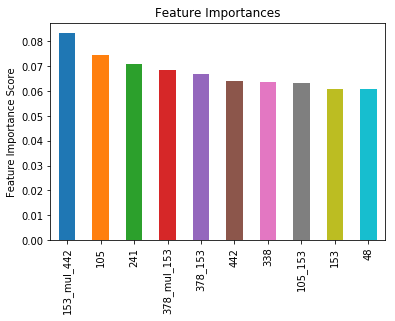

Random Forest Classifier:
Test AUC-ROC value is 0.9406166666666665
Test Accuracy is 0.8666666666666667




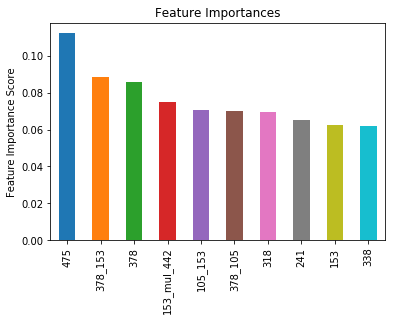

Gradient Boosting Model:
Test AUC-ROC value is 0.9119888888888888
Test Accuracy is 0.84




In [126]:
test_pred_glm = base.logistic_regression(x_train,y_train,x_test,y_test)
test_pred_knn = base.knn(x_train,y_train,x_test,y_test)
test_pred_rf,imp_table_rf = base.random_forest(x_train,y_train,x_test,y_test)
test_pred_gbm,imp_table_gbm = base.boosting_model(x_train,y_train,x_test,y_test)

Note: We can see that creating new features improved the baseline model performances significantly especially for Logistic Regression and Gradient Boosting

### Execute the below celss only to tune the parameters
### Note: Will take a long time to execute

## Parameter Tuning using 5 Fold CV

In [72]:
class param_tuning:
    def glm_tuning(self,x_train,y_train):
        lambda_vals = [0.001,0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000]
        #lambda_vals = [1000,10000,100000,1000000,10000000,100000000,1000000000,10000000000]
        lambda_vals1 = np.reciprocal(lambda_vals)
        acc_table = pd.DataFrame(columns = ['lambda_vals','CV_AUC'])
        acc_table['lambda_vals'] = lambda_vals

        j=0
        for i in lambda_vals1:
            avg = 0
            for a,b in skf.split(x_train,y_train):
                trn_x, trn_y = x_train.iloc[a], y_train[0].iloc[a]
                val_x, val_y = x_train.iloc[b], y_train[0].iloc[b]
                lr = LogisticRegression(penalty = 'l1', C = i,random_state=20)
                lr.fit(trn_x,trn_y)
                test_pred = lr.predict_proba(val_x)[:,1]
                avg+=roc_auc_score(val_y, test_pred)

            avg1 = avg/5.0
            acc_table.iloc[j,1] = avg1
            j = j+1
        
        acc_table = acc_table.sort_index(by=['CV_AUC'], ascending=[False])
        #id_max = acc_table['CV_AUC'].argmax()
        print("The best C value (Inverse of Lambda) for GLM is {}".format(1/acc_table.iloc[0,0]))
        #return(acc_table)
    
    def knn_tuning(self,x_train,y_train):
        k_range = list(range(1, 31))
        param_grid = dict(n_neighbors=k_range)
        knn = KNeighborsClassifier()
        grid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
        grid.fit(x_train,y_train)
        print(grid.best_params_)
    
    def rf_tuning(self,x_train,y_train):
        param_grid = { 
            'n_estimators': [400,500,600,700],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [7,8,10,20],
            'criterion' :['gini', 'entropy']
                     }
        rfc = RandomForestClassifier(random_state=20)
        CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
        CV_rfc.fit(x_train, y_train)
        print(CV_rfc.best_params_)
    
    def gbm_tuning(self,x_train,y_train):
        parameters = {
                    "learning_rate": [0.05, 0.1, 0.2],
                   # "learning_rate": [0.2],
                    #"min_samples_split": np.linspace(0.1, 0.5, 12),
                  #  "min_samples_leaf": [0.1,0.2,0.3,0.4,0.5], #np.linspace(0.1, 0.5, 12),
                    "max_depth":[7,8,10,20],
                    #"max_depth":[8],
                    #"max_features":["log2","sqrt"],
                    #"scoring": ["roc_auc"],
                   #"subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
                    "n_estimators":[400,500,600,700]
                    #"n_estimators":[500]
                    }

        clf_gb = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3)
        clf_gb.fit(x_train,y_train)
        print(clf_gb.best_params_)

In [44]:
skf = StratifiedKFold(n_splits=5)
tuning = param_tuning()
tuning.glm_tuning(x_train,y_train)

The best C value (Inverse of Lambda) for GLM is 0.001


In [42]:
tuning.rf_tuning(x_train,y_train)

{'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 600}


In [43]:
tuning.gbm_tuning(x_train,y_train)

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500}


In [75]:
tuning = param_tuning()
tuning.knn_tuning(x_train,y_train)

{'n_neighbors': 6}


## Running the models on the tuned parameters

In [127]:
class tuned_models:
    
    def logistic_regression(self,x_train,y_train,x_test,y_test,x_val,y_val):
        lr = LogisticRegression(penalty = 'l2', C = 0.001,random_state=20)
        #lr = LogisticRegression(penalty = 'l1', C = 0.001,random_state=20)
        lr.fit(x_train,y_train)
        train_pred = lr.predict_proba(x_train)[:,1]
        test_pred = lr.predict_proba(x_test)[:,1]
        val_pred = lr.predict_proba(x_val)[:,1]
        test_pred1 = lr.predict(x_test)
        print("Logistic Regression:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred,val_pred)
    
    def knn(self,x_train,y_train,x_test,y_test,x_val,y_val):
        neigh = KNeighborsClassifier(n_neighbors=6)
        neigh.fit(x_train, y_train)
        train_pred = neigh.predict_proba(x_train)[:,1]
        test_pred1 = neigh.predict(x_test)
        test_pred = neigh.predict_proba(x_test)[:,1]
        val_pred = neigh.predict_proba(x_val)[:,1]
        print("K Nearest Neighbour Classifier:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred,val_pred)
            
    
    def random_forest(self,x_train,y_train,x_test,y_test,x_val,y_val):

        cf_rf = RandomForestClassifier(max_features='auto', n_estimators= 600, max_depth=20, criterion='gini',random_state=20)
        cf_rf.fit(x_train,y_train)
        train_pred = cf_rf.predict_proba(x_train)[:,1]
        test_pred = cf_rf.predict_proba(x_test)[:,1]
        test_pred1 = cf_rf.predict(x_test)
        val_pred = cf_rf.predict_proba(x_val)[:,1]
        features = x_train.columns#[1:10]
        importances = cf_rf.feature_importances_#[1:10]
        indices = np.argsort(importances)
        imp_table = pd.DataFrame(columns = ['Feature','Value'])
        imp_table['Feature'] = x_train.columns
        imp_table['Value'] = cf_rf.feature_importances_
        #plt.title('Feature Importance for Random Forest')
        #plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        #plt.yticks(range(len(indices)), [features[i] for i in indices])
        #plt.xlabel('Relative Importance')
        feat_imp = pd.Series(cf_rf.feature_importances_, features).sort_values(ascending=False)
        feat_imp = feat_imp[0:10]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
        plt.show()
        
        print("Random Forest Classifier:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred,val_pred,imp_table)
        
    def boosting_model(self,x_train,y_train,x_test,y_test,x_val,y_val):

        cf_gb = GradientBoostingClassifier(learning_rate=0.1,max_depth=8,n_estimators=500,random_state=20)
        cf_gb.fit(x_train,y_train)
        train_pred = cf_gb.predict_proba(x_train)[:,1]
        test_pred = cf_gb.predict_proba(x_test)[:,1]
        test_pred1 = cf_gb.predict(x_test)
        val_pred = cf_gb.predict_proba(x_val)[:,1]
        features = x_train.columns#[1:10]
        importances = cf_gb.feature_importances_#[1:10]
        indices = np.argsort(importances)
        imp_table = pd.DataFrame(columns = ['Feature','Value'])
        imp_table['Feature'] = x_train.columns
        imp_table['Value'] = cf_gb.feature_importances_
        #plt.title('Feature Importance for Gradient Boosting')
        #plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        #plt.yticks(range(len(indices)), [features[i] for i in indices])
        #plt.xlabel('Relative Importance')
        feat_imp = pd.Series(cf_gb.feature_importances_, features).sort_values(ascending=False)
        feat_imp = feat_imp[0:10]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        plt.show()
        print("Gradient Boosting Model:")
        print("Test AUC-ROC value is {}".format(roc_auc_score(y_test, test_pred)))
        print("Test Accuracy is {}".format(accuracy_score(y_test,test_pred1)))
        print("\n")
        return(test_pred,val_pred,imp_table)



#### Splitting the train data into 90-10 for storing validation results which can be used for stacking

In [128]:
tuned1 = tuned_models()
x_train1, x_val, y_train1, y_val = train_test_split(x_train,y_train,stratify=y_train,test_size=0.1,random_state=20)

Logistic Regression:
Test AUC-ROC value is 0.6281555555555556
Test Accuracy is 0.5816666666666667




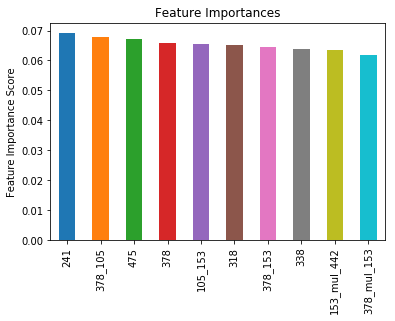

Random Forest Classifier:
Test AUC-ROC value is 0.95885
Test Accuracy is 0.8883333333333333


K Nearest Neighbour Classifier:
Test AUC-ROC value is 0.9631833333333333
Test Accuracy is 0.9066666666666666




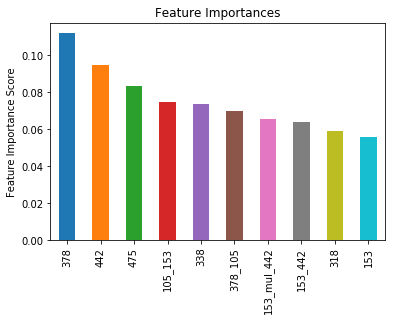

Gradient Boosting Model:
Test AUC-ROC value is 0.9545666666666666
Test Accuracy is 0.8933333333333333




In [129]:
val_table = pd.DataFrame(columns = ['Actuals','glm','knn','rf','gbm'])
val_table['Actuals'] = y_val[0]
test_table = pd.DataFrame(columns = ['Actuals','glm','knn','rf','gbm'])
test_table['Actuals'] = y_test[0]

test_table['glm'],val_table['glm'] = tuned1.logistic_regression(x_train1,y_train1,x_test,y_test,x_val,y_val)
test_table['rf'],val_table['rf'],imp_table1 = tuned1.random_forest(x_train1,y_train1,x_test,y_test,x_val,y_val)
test_table['knn'],val_table['knn'] = tuned1.knn(x_train1,y_train1,x_test,y_test,x_val,y_val)
test_table['gbm'],val_table['gbm'],imp_table = tuned1.boosting_model(x_train1,y_train1,x_test,y_test,x_val,y_val)


    Note: 
    1. We can notice that after parameter tuning, all of the models are performing better when compared to it's corresponding baseline models
    2. We have saved the results of each model (Validation and Test) to be used for stacking

#### Building another model using the entire train set

Logistic Regression:
Test AUC-ROC value is 0.627388888888889
Test Accuracy is 0.5933333333333334


K Nearest Neighbour Classifier:
Test AUC-ROC value is 0.9633777777777777
Test Accuracy is 0.9083333333333333




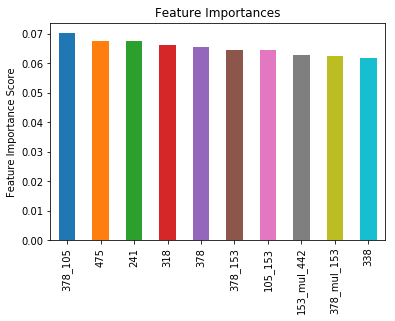

Random Forest Classifier:
Test AUC-ROC value is 0.9589555555555556
Test Accuracy is 0.89




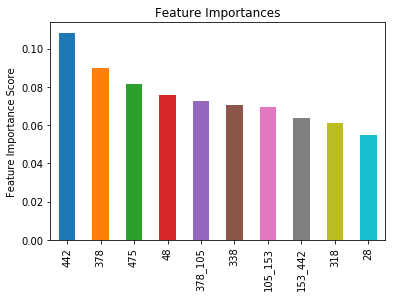

Gradient Boosting Model:
Test AUC-ROC value is 0.9541555555555555
Test Accuracy is 0.8816666666666667




In [130]:
tuned1 = tuned_models()
x_val,y_val = x_train,y_train
test_pred_glm,val_pred_glm = tuned1.logistic_regression(x_train,y_train,x_test,y_test,x_val,y_val)
test_pred_knn,val_pred_knn = tuned1.knn(x_train,y_train,x_test,y_test,x_val,y_val)
test_pred_rf,val_pred_rf,imp_table1 = tuned1.random_forest(x_train,y_train,x_test,y_test,x_val,y_val)
test_pred_gbm,val_pred_gbm,imp_table = tuned1.boosting_model(x_train,y_train,x_test,y_test,x_val,y_val)

Note: We can see that all our model performances have improved

#### Taking ensemble of the above models
Note: We ignore Logistic since it has poor accuracy in comparision to other models

In [131]:
ensemble = (0.2*test_pred_gbm) + (0.45*test_pred_knn) + (0.35*test_pred_rf)
print(roc_auc_score(y_test, ensemble))

0.9680777777777778


#### We Perform stacking using the results obtained through using a validation data.
    Note:
    1. We take the validation results stored in the 'val_table' for each of the 3 models (KNN,Random Forest and GBM) and run a logisitc regression using only these 3 results as the independent variables and predict on the test results stored in the 'test_table'

In [132]:
lr = LogisticRegression()
lr.fit(val_table.iloc[:,2:],val_table['Actuals'])
stack_pred = lr.predict_proba(test_table.iloc[:,2:])[:,1]
print(roc_auc_score(test_table['Actuals'], stack_pred))

0.9695555555555555


#### Eventually we take an ensemble of the above obtained 2 results

In [133]:
best_pred = ((0.15*stack_pred) + (0.85*ensemble))
print("The obtained AUC score on the test data is :{}".format(round(roc_auc_score(test_table['Actuals'],best_pred ),2)))

The obtained AUC score on the test data is :0.97


In [134]:
avg1 = np.where(best_pred<0.65,-1,1)
print("The obtained Accuracy on the test data is :{}".format(accuracy_score(y_test,avg1)))

The obtained Accuracy on the test data is :0.9116666666666666


In [135]:
df_confusion = pd.crosstab(y_test[0], avg1)
print("The obtained confusion matrix on the test data is :\n")
df_confusion

The obtained confusion matrix on the test data is :



col_0,-1,1
0,,
-1,287,13
1,40,260
